# Logistic Regression

# What is Logistic Regression?

> * ##### Logistic regression is a classification algorithm used to predict a discrete set of classes. 
* #####  It is used to predict the outcomes of a categorical dependent variable
* #####  Outcome should be discrete or categorical
##### Example 
* 0 or 1
* yes or no
* true or false
* high or low
* survied or not survied
* spam or not spam
* Low, Medium, High
* etc


# Why logistic Regression

Suppose you have given data on "time spent on studying and exam scores by students". Linear Regression and logistic regression can predict different things-

Linear Regression could help us predict the student’s test score on a scale of 0 - 100.

Logistic Regression could help us to predict whether the student passed or failed.

## Types of logistic regression

* Binary Logistic Regression (0/1)  --> has only two 2 possible outcomes

* Multinomial Logistic Regression (Veg, Non-Veg, Vegan) --> Three or more categories without ordering

* Ordinal Logistic Regression (Low, Medium, High or movie rating 1 to 5) --> Three or more categories with ordering

# Logistic Regression Equation

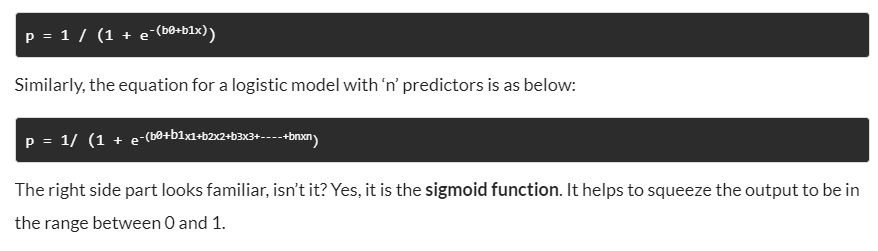

# Sigmoid Function

The sigmoid function is useful to map any predicted values of probabilities into another value between 0 and 1.
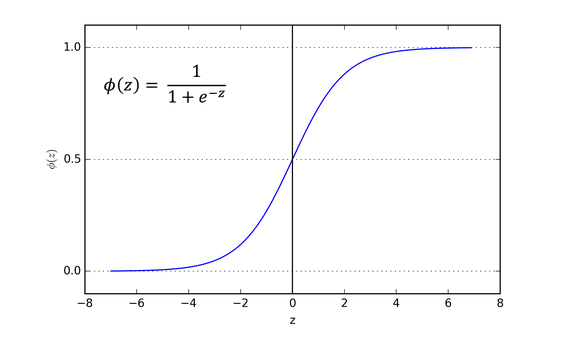

We started with a linear equation and ended up with a logistic regression model with the help of a sigmoid function.

    Linear model: ŷ = b0+b1x
    Sigmoid function: σ(z) = 1/(1+e−z)
    Logistic regression model: ŷ = σ(b0+b1x) = 1/(1+e-(b0+b1x))

So, unlike linear regression, we get an ‘S’ shaped curve in logistic regression.
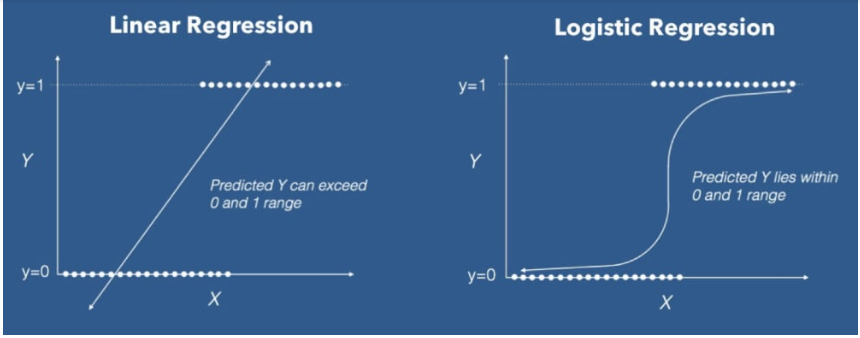

# Implementation in Python using Scikit-learn library

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values
print(dataset.head())
#print(X)
#print(y)
type(X)

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


numpy.ndarray

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test)


[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

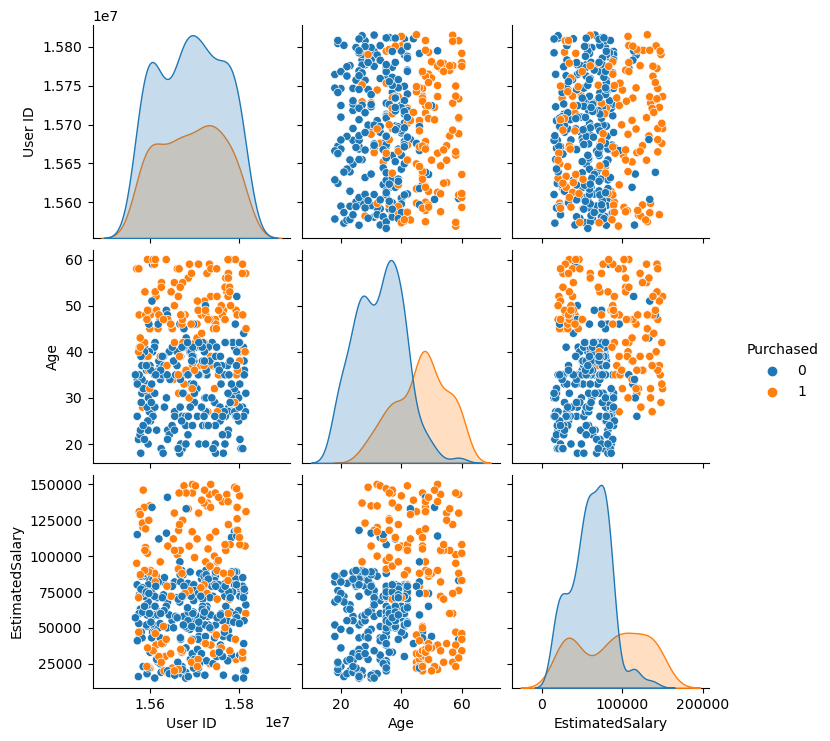

In [5]:
import seaborn as sns

sns.pairplot(dataset,hue='Purchased')

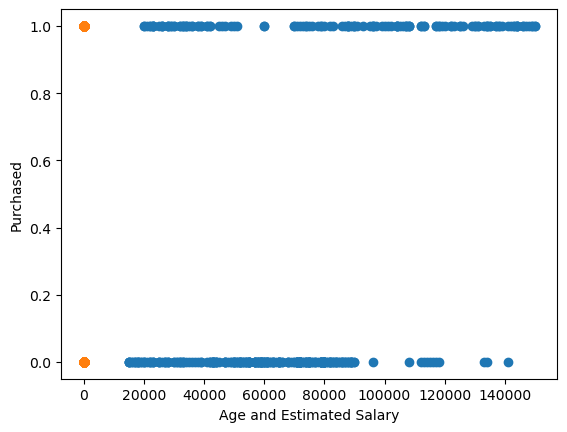

In [6]:
plt.scatter(dataset.EstimatedSalary, dataset.Purchased)
plt.scatter(dataset.Age,dataset.Purchased)
plt.xlabel('Age and Estimated Salary')
plt.ylabel('Purchased')
plt.show()

## Training the Logistic Regression model on the Training set

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


## Making the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


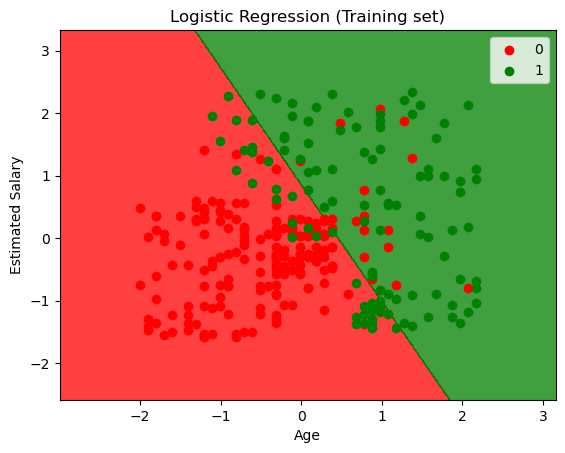

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


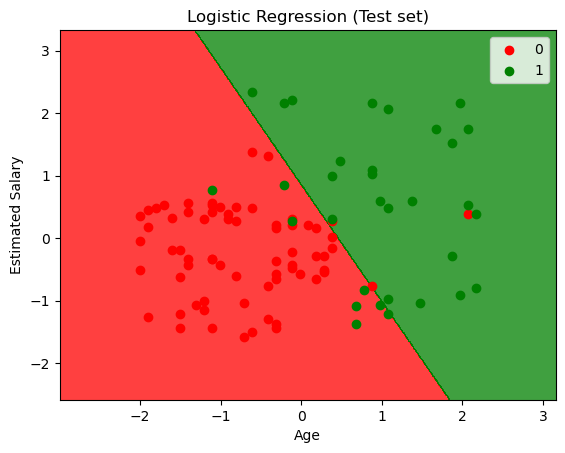

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [12]:
np.corrcoef(dataset.EstimatedSalary,dataset.Purchased)

array([[1.        , 0.36208303],
       [0.36208303, 1.        ]])

In [13]:
print (classifier.intercept_, classifier.coef_)   # b0 , b1 ,b2

[-0.9523224] [[2.07669377 1.1102991 ]]


In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
# Evaluate Model
accuracy_score(y_test,y_pred)

0.89

# Classification

Classification usually refers to any kind of problem where a specific type of class label is the result to be predicted from the given input field of data. Some types of Classification challenges are :

    Classifying emails as spam or not
    Classify a given handwritten character to be either a known character or not
    Classify recent user behaviour as churn or not
For any model, you will require a training dataset with many examples of inputs and outputs from which the model will train itself. The training data must include all the possible scenarios of the problem and must have sufficient data for each label for the model to be trained correctly. Class labels are often returned as string values and hence needs to be encoded into an integer like either representing 0 for “spam” and 1 for “no-spam”.